In [1]:
import math
import random
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.mst.pamst import pamst, comp_mst_weight
from src.mst.mst_utilities import compute_real_mst_weight, generate_random_complete_graph, compute_input_perturbation

sns.set_theme(font_scale=1.5, rc={'text.usetex' : True})



In [48]:
# Computing Private Minimum Spanning Trees using Different Algorithms, Using l_infty neighboroing relationsip

# Privacy Parameters
#rho_values = [0.1,0.015,0.2,0.375,0.5,1,2,4,6,10, 100, 200]
rho_values = np.arange(0.0001, 200, 1)
n = 100
sensitivity = 1

# Generate a enw graph
G = generate_random_complete_graph(n)
print("Generated " + str(G))

### Real Spanning Tree ###

    # Simply make an array to make visualization easier
real_weights = [compute_real_mst_weight(G)] * len(rho_values) 
print("Real MST Weight: " + str(real_weights[0]))

### Pinot's PAMST Algorithm ###

pamst_weights = []
for rho in rho_values:
    noise_level = (2 * sensitivity * math.sqrt( (n-1)/(2 * rho))) # Should be ok
    pamst_edges = pamst(G, noise_level) # Gives an iterator which should only be executed once!
    pamst_weights += [comp_mst_weight(pamst_edges)]
#    print("PAMST MST Weight: " + str(pamst_weight))


### Sealfon's Post Processing Technique ###

sealfon_weights = []
for rho in rho_values:
    noise_level = n / (2*rho)
    gaussNoise = lambda edge_weight: edge_weight + np.random.normal(0, noise_level)
    sealfon_weights += [compute_input_perturbation(G.copy(), gaussNoise)]
    # print("Sealfon MST Weight: " + str(weight_sealfon))

### Finally: Our Approach ###
our_weights = []
for rho in rho_values:
    noise_level = sensitivity * math.sqrt(2*rho) / 2 * (n-1)
    # expNoise = lambda edge_weight: (math.log(np.random.exponential(1), math.e) + noise_level * edge_weight)
    expNoise = lambda edge_weight: (np.random.exponential(1) / np.exp(-noise_level * edge_weight))

    #    expNoise = lambda noise_level, weight: 0
    our_weights += [compute_input_perturbation(G.copy(), expNoise)]
    # print("Our MST Weight: " + str(weight_sealfon))

print(sealfon_weights)


## TODO Privacy / utility Tradeoff Curves.
## TODO Select Graph Classes we want to do experiments on.

Generated Graph with 100 nodes and 4950 edges
Real MST Weight: 1.1757988889490556


C:\Users\Lukas\AppData\Local\Temp\ipykernel_36648\1880195381.py:43: RuntimeWarning: overflow encountered in scalar divide
  expNoise = lambda edge_weight: (np.random.exponential(1) / np.exp(-noise_level * edge_weight))
C:\Users\Lukas\AppData\Local\Temp\ipykernel_36648\1880195381.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  expNoise = lambda edge_weight: (np.random.exponential(1) / np.exp(-noise_level * edge_weight))


[48.554993311482235, 48.31199546006258, 45.120875185013944, 46.55831858247908, 49.09061895722975, 45.31722191198359, 53.18920975850191, 43.27358539748702, 49.05395716564841, 47.249197828712475, 44.103741139231616, 39.67756746861837, 39.543346925026036, 43.98782029459066, 38.08559176452947, 43.62742967287343, 43.54730891805442, 48.771671292351456, 41.1694294332169, 40.27600342483045, 41.21236799674942, 38.11266000073449, 39.13314680715186, 39.71583639655469, 41.07514492933732, 41.485536654977174, 41.648824258717426, 40.069129599029665, 36.254720967758594, 36.59344935668919, 40.53969398181614, 39.241233805105864, 39.979520879956155, 35.82794121631753, 37.00392898309032, 37.372863162856966, 33.58898301397569, 31.577299329213755, 35.90808813305393, 33.75332520983835, 37.49011321900994, 32.465707050866115, 34.01348042687251, 31.57332953471811, 33.372963430970685, 33.5584052233605, 33.23244244275436, 30.179628459478877, 35.27515121067335, 33.9444290161375, 35.304858037786154, 31.960845959687

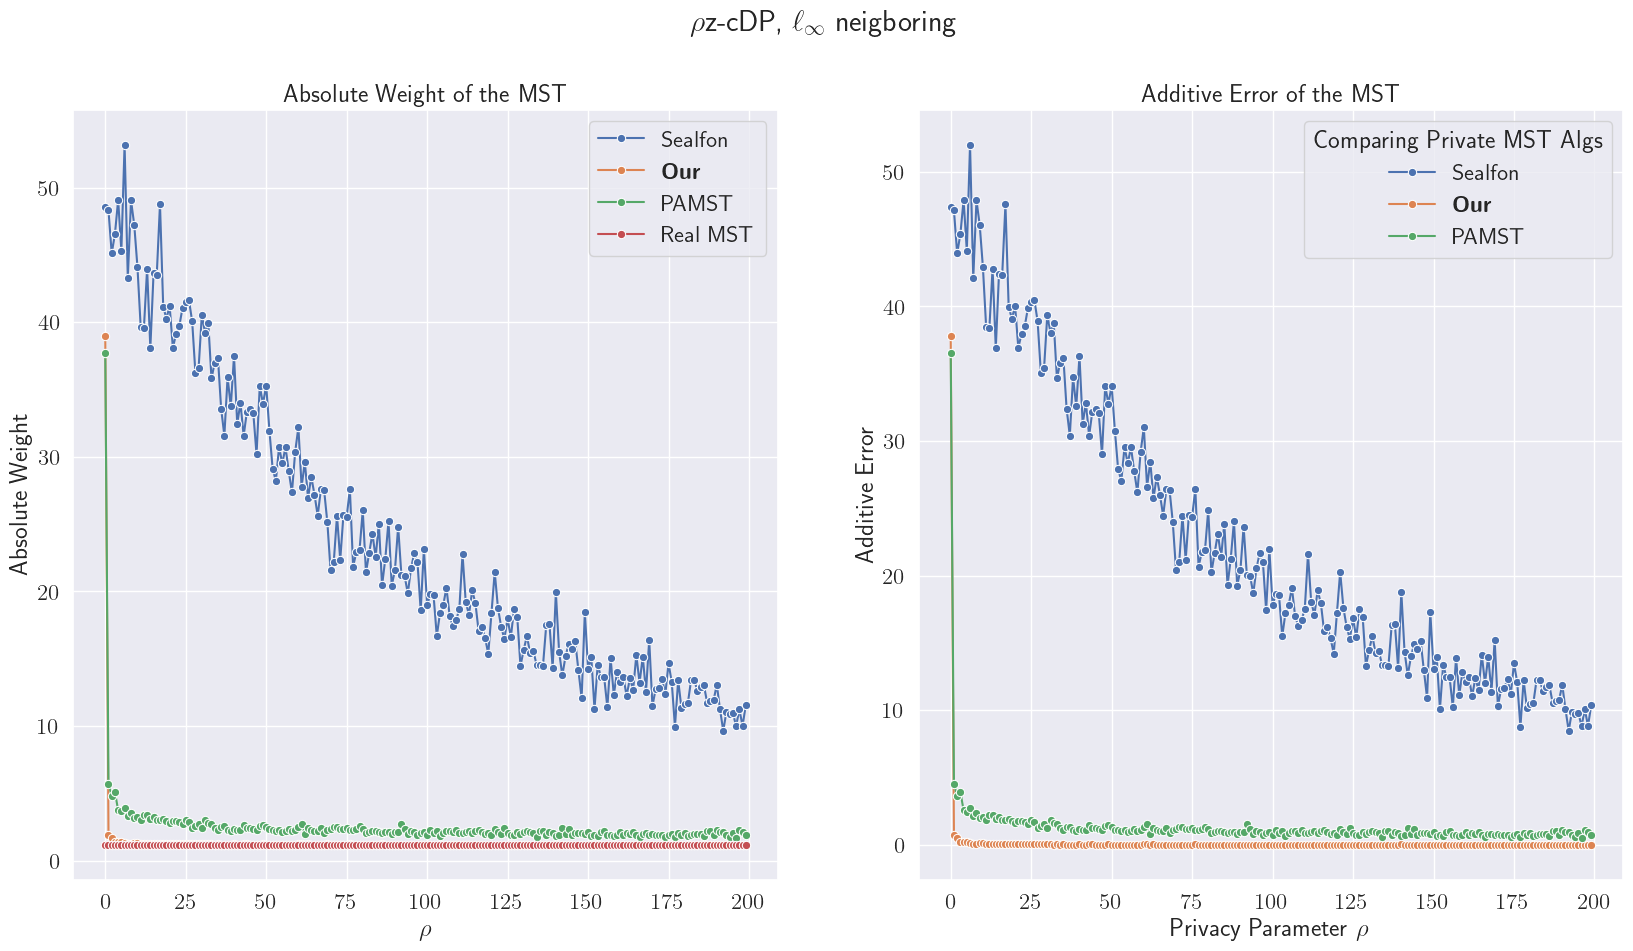

In [49]:
# Visualizing the results, Complete Graph

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 2x2 grid
fig.suptitle("$\\rho $z-cDP, $\\ell_\\infty$ neighboring")

# Error of the MST
sns.lineplot(x= rho_values, y=sealfon_weights,marker='o', label="Sealfon", ax=axs[0])
sns.lineplot(x= rho_values, y=our_weights, marker='o', label="$\\textbf{Our}$", ax=axs[0])
sns.lineplot(x= rho_values, y=pamst_weights, marker='o', label="PAMST", ax=axs[0])
sns.lineplot(x= rho_values, y=real_weights, marker='o', label="Real MST", ax=axs[0])
axs[0].set_title("Absolute Weight of the MST")

# Error of the MST
sns.lineplot(x= rho_values, y=[sealfon - real for sealfon, real in zip(sealfon_weights, real_weights)] ,marker='o', label="Sealfon", ax=axs[1])
sns.lineplot(x= rho_values, y=[ours - real for ours, real in zip(our_weights, real_weights)] , marker='o', label="$\\textbf{Our}$", ax=axs[1])
sns.lineplot(x= rho_values, y=[pamst - real for pamst, real in zip(pamst_weights, real_weights)] , marker='o', label="PAMST", ax=axs[1])
axs[1].set_title("Additive Error of the MST")
axs[0].set_ylabel("Absolute Weight")
axs[0].set_xlabel("$\\rho$")
axs[1].set_ylabel("Additive Error")

# Set plot title and labels
# plt.title("Real MSTs")
plt.xlabel("Privacy Parameter $\\rho$")
# plt.ylabel("MST Weight")
plt.legend(title = "Comparing Private MST Algs")
plt.show()
